In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np

In [2]:
imdb = keras.datasets.imdb

In [3]:
# 단어와 정수 인덱스를 매핑한 딕셔너리
word_index = imdb.get_word_index()
# word_index
# word_index['movie']
# # 처음 몇 개 인덱스는 사전에 정의되어 있습니다
# word_index = {k:(v+3) for k,v in word_index.items()}
# word_index["<PAD>"] = 0
# word_index["<START>"] = 1
# word_index["<UNK>"] = 2  # unknown
# word_index["<UNUSED>"] = 3


1646592/1641221 [==============================] - 0s 0us/step


In [4]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

# index_to_word = {word_index[k]: k for k in word_index}
# for w in x_train[0] :
#   print(word_index[w], end=', ')

In [5]:
(x_train_all, y_train), (x_test_all, y_test) = imdb.load_data(num_words=1000, skip_top=20)  #num_words=10000

for i in range(len(x_train_all)):
  x_train_all[i] = [w for w in x_train_all[i] if w > 2]

17465344/17464789 [==============================] - 0s 0us/step


In [6]:
type(x_train_all), x_train_all.shape, x_train_all

(numpy.ndarray,
 (25000,),
 array([list([22, 43, 530, 973, 65, 458, 66, 173, 36, 256, 25, 100, 43, 838, 112, 50, 670, 35, 480, 284, 150, 172, 112, 167, 336, 385, 39, 172, 546, 38, 447, 192, 50, 147, 22, 469, 22, 71, 87, 43, 530, 38, 76, 22, 515, 626, 62, 386, 316, 106, 480, 66, 33, 130, 38, 619, 25, 124, 51, 36, 135, 48, 25, 33, 22, 215, 28, 77, 52, 407, 82, 107, 117, 256, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 104, 88, 381, 297, 98, 32, 56, 26, 141, 194, 226, 22, 21, 134, 476, 26, 480, 144, 30, 51, 36, 28, 224, 92, 25, 104, 226, 65, 38, 88, 283, 113, 103, 32, 178, 32]),
        list([194, 194, 78, 228, 134, 26, 715, 118, 394, 20, 119, 954, 189, 102, 207, 110, 21, 69, 188, 30, 23, 249, 126, 93, 114, 647, 116, 35, 229, 340, 118, 130, 89, 29, 952, 46, 37, 455, 45, 43, 38, 398, 26, 163, 194, 775, 349, 148, 605, 123, 125, 68, 349, 165, 98, 228, 43, 299, 120, 120, 174, 220, 175, 136, 50, 228, 656, 245, 131, 152, 491, 32, 371, 78, 22, 625, 64, 168, 145, 23, 28, 52, 154, 462, 33, 89, 78

In [7]:
decode_review(x_train_all[0])  

"you out themselves powerful their becomes had lot from anyone have after out atmosphere never more room so heart shows years every never going help moments or every except her several enough more now you unfortunately you than him out themselves her get you sometimes scary story wonderful seeing character heart had they here her serious have does when from why what have they you isn't one will very itself other seen over anyone whether from than out themselves history he name half some two most mean 1 any an she he should thought script you not while history he heart real at when from one bit then have two script their her most wasn't acting watch an want an"

In [8]:
len(x_train_all[3]), len(x_train_all[5])

(248, 22)

In [9]:
max_len = max(len(item) for item in x_train_all)
print(max_len)

862


In [10]:
# x_train = keras.preprocessing.sequence.pad_sequences(y_train_all,
#                                                         value=word_index["<PAD>"],
#                                                         padding='post',
#                                                         maxlen=256)
pad_len = 100
x_train = keras.preprocessing.sequence.pad_sequences(x_train_all, maxlen=pad_len)
x_test = keras.preprocessing.sequence.pad_sequences(x_test_all, maxlen=pad_len)

In [11]:
max_len = max(len(item) for item in x_train)
print(max_len)

100


In [12]:
# len(x_train_seq[3]), len(x_train_seq[5]), x_train_seq[5]

In [13]:
## one hot
# x_train = keras.utils.to_categorical(x_train)
# x_test = keras.utils.to_categorical(x_test)

In [14]:
x_train.shape, x_test.shape

((25000, 100), (25000, 100))

In [15]:
from tensorflow.keras import layers

vocab_size = 1000    # num_words

model = keras.Sequential()
# one hot in case
# model.add(layers.SimpleRNN(32, input_shape=(pad_len,vocab_size), return_sequences=True))    # one hot in case
# model.add(layers.Dropout(0.3))

# Embedding in case
# model.add(layers.Embedding(input_dim=vocab_size, output_dim=32))
# model.add(layers.SimpleRNN(32, return_sequences=True))            # Embedding in case
# model.add(layers.Dropout(0.3))

# LSTM
model.add(layers.Embedding(input_dim=vocab_size, output_dim=32))
model.add(layers.LSTM(32, return_sequences=True))            # LSTM
model.add(layers.Dropout(0.3))
model.add(layers.LSTM(32, return_sequences=True))            # LSTM
model.add(layers.Dropout(0.3))


model.add(layers.GlobalAveragePooling1D())
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          32000     
_________________________________________________________________
lstm (LSTM)                  (None, None, 32)          8320      
_________________________________________________________________
dropout (Dropout)            (None, None, 32)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, None, 32)          8320      
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 32)          0         
_________________________________________________________________
global_average_pooling1d (Gl (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                5

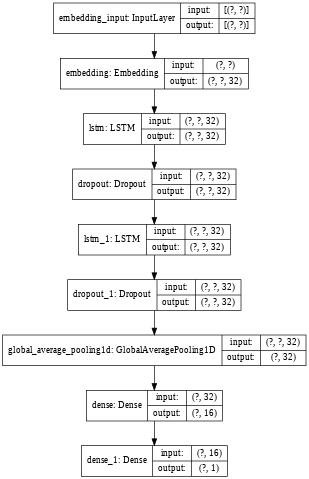

In [16]:
tf.keras.utils.plot_model(model, show_shapes=True, dpi=48)

In [17]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [18]:
hist = model.fit(x_train,
                    y_train,
                    epochs=2,
                    batch_size=512,
                    validation_split=0.3,
                    verbose=1)

Epoch 1/2
35/35 [==============================] - 15s 419ms/step - loss: 0.6719 - accuracy: 0.6089 - val_loss: 0.5965 - val_accuracy: 0.6888
Epoch 2/2
35/35 [==============================] - 14s 405ms/step - loss: 0.4931 - accuracy: 0.7693 - val_loss: 0.4404 - val_accuracy: 0.8083


In [19]:
## Embedding
results = model.evaluate(x_test,  y_test, verbose=2)

print(results)

782/782 - 13s - loss: 0.4752 - accuracy: 0.7791
[0.4752427041530609, 0.7790799736976624]


In [20]:
# word_index

In [21]:
def encode_review(text):
  result = [word_index.get(i, 2) for i in text.split()]
  result = [w for w in result if w > 2]
  result = keras.preprocessing.sequence.pad_sequences(result, maxlen=100)
  return result

In [38]:
pred_text = 'A smart, fun and sharp satire that manages to take aim at most everyone in our political landscape and score some hits, and laughs.'
result = [word_index.get(i, 2) for i in pred_text.split()]
result = [w for w in result if w > 2 and w < 1000]
# result
result = tf.keras.preprocessing.sequence.pad_sequences([result], maxlen=100)
result, result.shape, x_test.shape

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 250,  12,   5,
         190,  30,  88, 313,   8, 260, 990, 600,  46]], dtype=int32),
 (1, 100),
 (25000, 100))

In [39]:
model.input, type(result), result.shape

(<tf.Tensor 'embedding_input:0' shape=(None, None) dtype=float32>,
 numpy.ndarray,
 (1, 100))

In [40]:
model.predict(result)

array([[0.51110965]], dtype=float32)

In [24]:
history_dict = hist.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

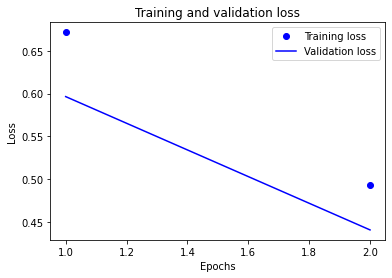

In [25]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo"는 "파란색 점"입니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# b는 "파란 실선"입니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

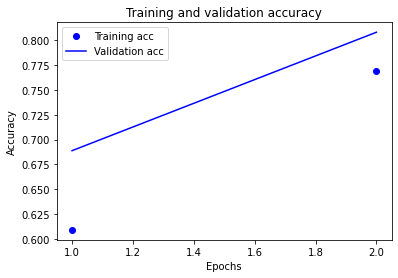

In [26]:
plt.clf()   # 그림을 초기화합니다

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()